In [10]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all("tr")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace("$", "").replace(",", "")
    if revenue != "":
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.tail()


NameError: name 'rows' is not defined

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all("tr")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace("$", "").replace(",", "")
    if revenue != "":
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.tail()


NameError: name 'rows' is not defined

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request to the URL
html_data = requests.get(url).text

# Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing 'Tesla Quarterly Revenue'
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        target_table = table
        break

# Get all rows from the table
rows = target_table.find_all("tr")

# Create dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through rows and extract data
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Drop empty rows
tesla_revenue.dropna(inplace=True)

# Display last five rows
tesla_revenue.tail()


NameError: name 'target_table' is not defined

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Request the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Look for all tables
tables = soup.find_all("table")

# Step 4: Safely find the table that contains Tesla Quarterly Revenue
target_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        target_table = table
        break

# Step 5: Check if the table was found
if target_table is None:
    raise ValueError("Tesla Revenue table not found on the page. The page structure may have changed.")

# Step 6: Extract data from the table
rows = target_table.find_all("tr")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip empty rows
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

# Final clean-up
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()


ValueError: Tesla Revenue table not found on the page. The page structure may have changed.

In [ ]:
import pandas as pd

# Fetch all tables from the webpage
tables = pd.read_html("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")

# Loop through tables to find the one with Tesla Quarterly Revenue
for table in tables:
    if "Tesla Quarterly Revenue" in table.columns:
        tesla_revenue = table
        break

# Clean and display the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]  # Remove empty rows
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.tail()


HTTPError: HTTP Error 403: Forbidden

In [ ]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "lxml")

# Search for the correct table
tables = soup.find_all("table")
target_table = None

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        target_table = table
        break

if target_table is None:
    raise ValueError("Tesla Revenue table not found on the page. The page structure may have changed.")

# Parse rows
rows = target_table.find_all("tr")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.tail()


FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [13]:
!pip install lxml


In [14]:
from bs4 import BeautifulSoup
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "lxml")  # Will now work


FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [15]:
from bs4 import BeautifulSoup
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")
  # Will now work


In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Fetch Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse HTML using html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables
tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Loop through tables to find the one containing "Tesla Quarterly Revenue"
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Skip empty revenues
                    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Step 5: Show the last 5 entries
tesla_revenue.tail()


,Date,Revenue


In [17]:
# Step 1: Fetch GME revenue page
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html = requests.get(gme_url).text

# Step 2: Parse HTML using html.parser
gme_soup = BeautifulSoup(gme_html, "html.parser")

# Step 3: Find all tables
gme_tables = gme_soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Loop through tables to find the one containing "GameStop Quarterly Revenue"
for table in gme_tables:
    if "GameStop Quarterly Revenue" in str(table):
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Step 5: Show the last 5 entries
gme_revenue.tail()


,Date,Revenue


In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [19]:
# Step 1: Fetch GME revenue page
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html = requests.get(gme_url).text

# Step 2: Parse HTML using html.parser
gme_soup = BeautifulSoup(gme_html, "html.parser")

# Step 3: Find all tables
gme_tables = gme_soup.find_all("table")


In [20]:
len(gme_tables)


0

In [21]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in gme_tables:
    if "GameStop Quarterly Revenue" in str(table):
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue and revenue != "":  # Avoid empty revenue
                    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

gme_revenue.tail()


,Date,Revenue


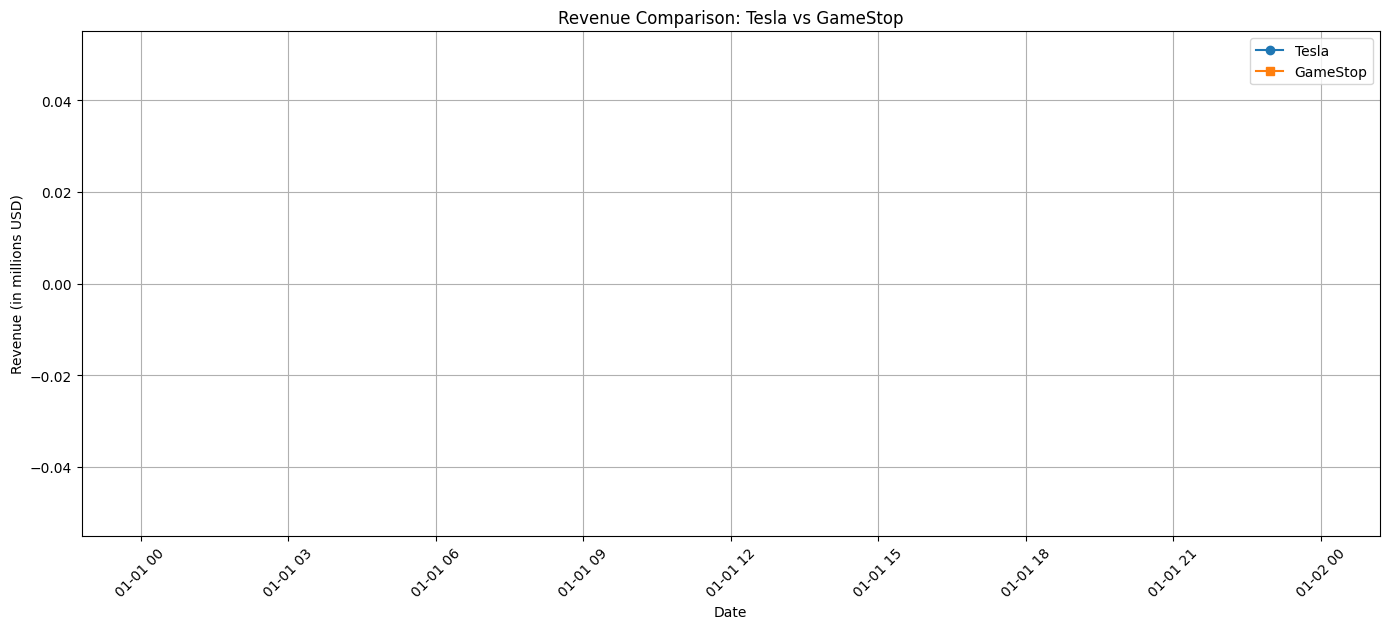

In [22]:
import matplotlib.pyplot as plt

# Convert Revenue column to numeric (in millions), and Date to datetime
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Sort data by date
tesla_revenue = tesla_revenue.sort_values("Date")
gme_revenue = gme_revenue.sort_values("Date")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla", marker='o')
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], label="GameStop", marker='s')

plt.title("Revenue Comparison: Tesla vs GameStop")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [23]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    # Convert Date columns to datetime
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    
    # Convert revenue to numeric
    revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors='coerce')

    # Sort values just in case
    stock_data = stock_data.sort_values("Date")
    revenue_data = revenue_data.sort_values("Date")

    # Create subplots
    fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Plot stock price
    ax[0].plot(stock_data["Date"], stock_data["Close"], label=f"{stock} Stock Price", color="blue")
    ax[0].set_ylabel("Stock Price (USD)")
    ax[0].set_title(f"{stock} Stock Price")

    # Plot revenue
    ax[1].plot(revenue_data["Date"], revenue_data["Revenue"], label=f"{stock} Revenue", color="green")
    ax[1].set_ylabel("Revenue (in millions USD)")
    ax[1].set_title(f"{stock} Revenue")

    # Styling
    for a in ax:
        a.grid(True)
        a.legend()

    plt.xlabel("Date")
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


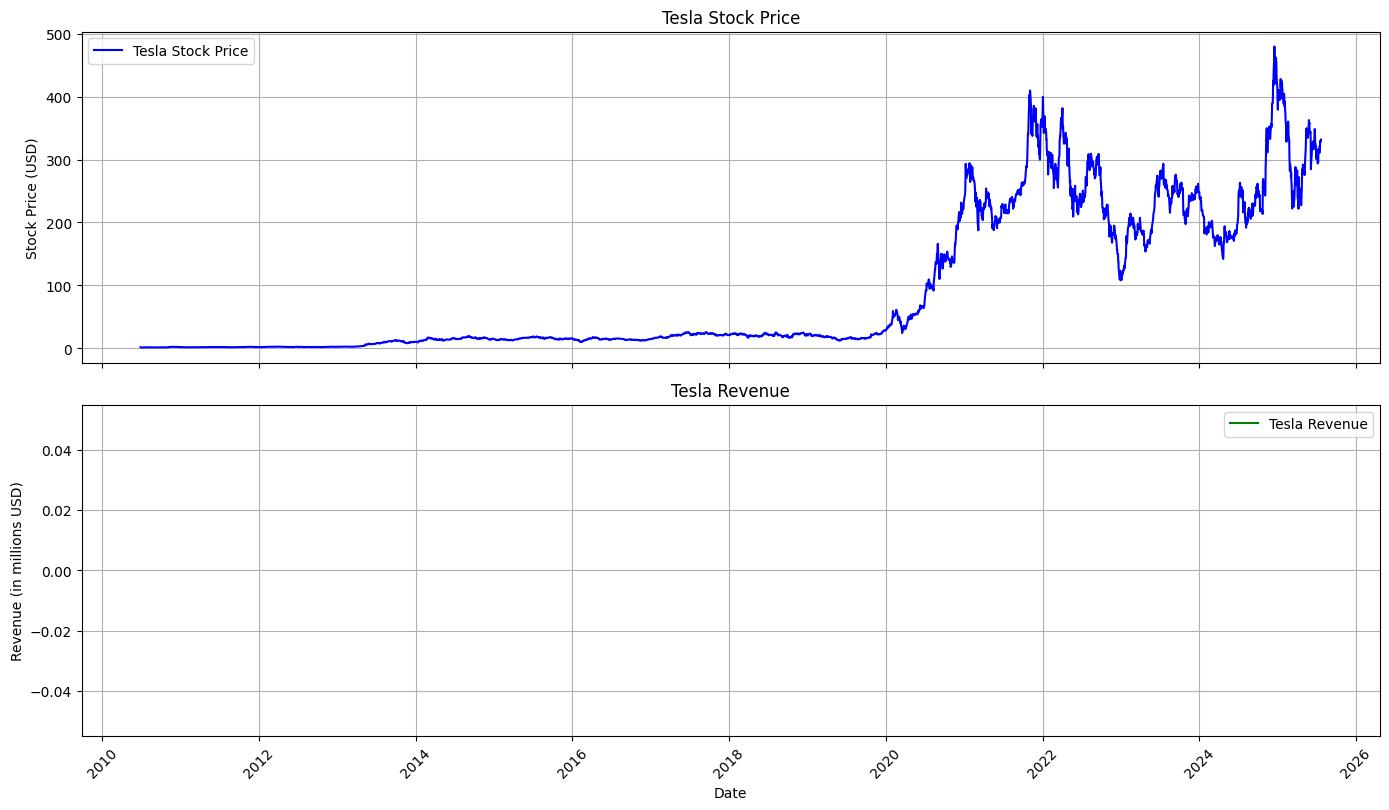

NameError: name 'gme_data' is not defined

In [24]:
make_graph(tesla_data, tesla_revenue, 'Tesla')
make_graph(gme_data, gme_revenue, 'GameStop')


In [25]:
def quarterly_trend(revenue_df):
    # Ensure Date is datetime and Revenue is numeric
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])
    revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
    
    # Drop NaNs
    revenue_df = revenue_df.dropna()

    # Extract Quarter and Year
    revenue_df["Quarter"] = revenue_df["Date"].dt.to_period("Q")

    # Group by Quarter
    trend_df = revenue_df.groupby("Quarter")["Revenue"].sum().reset_index()
    
    # Calculate Change
    trend_df["Change"] = trend_df["Revenue"].diff()

    return trend_df


In [26]:
tesla_quarters = quarterly_trend(tesla_revenue)
gme_quarters = quarterly_trend(gme_revenue)

print("Tesla Quarterly Revenue Trend:\n", tesla_quarters)
print("\nGameStop Quarterly Revenue Trend:\n", gme_quarters)


Tesla Quarterly Revenue Trend:
 Empty DataFrame
Columns: [Quarter, Revenue, Change]
Index: []

GameStop Quarterly Revenue Trend:
 Empty DataFrame
Columns: [Quarter, Revenue, Change]
Index: []
